# 15 - Harmonic Oscillator

In [ ]:
import vpython as vp

scene=vp.canvas()

ball = vp.sphere(pos=vp.vector(-2,-2,0), radius=1, color=vp.color.green)
wall = vp.box(pos=vp.vector(-4,-2,0), length=.2, height=4, width=4)
floor = vp.box(pos=vp.vector(0,-3.1,0), length=8, height=0.2, width=4)
spring = vp.helix(pos=wall.pos, thickness=0.1, radius=0.5)

dt = 0.1
v = 0.0

i = 0
N = 500
while i<N:
    vp.rate(50)
    ball.pos.x = ball.pos.x + v*dt
    v = v-ball.pos.x*dt # Euler-Cromer method... Look it up!
    spring.length = ball.pos.x + 3
    i += 1

## Equation of motion

From Hooke's law, we know that the equation of motion for a one-dimensional harmonic oscillator is given by $F(x)=-kx$ for spring constant $k$. Rearranging this and defining a natural frequency $\omega_0=\sqrt{k/m}$ where $m$ is the ball's mass, we find the governing differential equation: 

\begin{equation*} \frac{\mathrm{d}^2 x}{\mathrm{d}t^2} + \omega_0^2 x = 0. \end{equation*}



<br><br><br><br><br><br><br><br><br><br><br><br><br>

## Damped oscillator

In reality, forces like friction or air resistance result in dissipation, or damping, or the oscillatory motion. If we assume viscous friction or linear drag of the form $f = -b v_x$, our governing differential equation becomes:

\begin{equation*} \frac{\mathrm{d}^2 x}{\mathrm{d}t^2} + 2\gamma\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega_0^2 x = 0 \end{equation*}

where $\gamma = \frac{b}{2m\omega_0}$ is the damping coefficient. The above equation represents the motion of a wide range of damped harmonic oscillators throughout physics and engineering such as the one pictured above, or the behavior of RLC series circuits (replacing position $x$ by charge $q$) and forms the basis for our continued exploration of oscillations and waves.

<br><br><br><br><br><br><br><br><br><br><br><br>
## Student exercise:
Write a program to solve 

$$ \frac{\mathrm{d}^2 x}{\mathrm{d}t^2} + 2\gamma\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega_0^2 x = 0 $$ 

for the ball on a spring moving horizontally and with $\gamma=0.2$, $\omega_0=1$, $x_0=1.0$, and $v_0=0$ on the time range $[0,20]$.

\begin{equation*} \frac{dx}{dt} = v_x,\quad \frac{dv_x}{dt} = -2\gamma\omega_0 v_x - \omega_0^2 x \end{equation*}

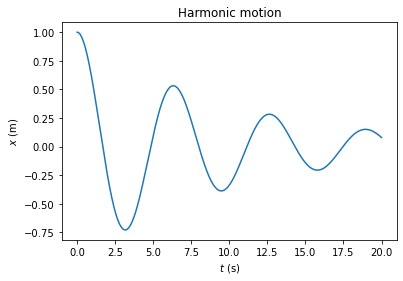

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(r,t):
    x = r[0]
    vx = r[1]
    fx = vx
    fvx = -2*gam*w0*vx-w0**2*x
    return fx, fvx

#run parameters
x0 = 1.0
vx0 = 0.0
gam = 0.1
w0 = 1
t0 = 0
tf = 20
N = 1e6
h = (tf-t0)/N

# data containers
tpoints = np.arange(t0,tf+h,h)

# Initializing
r = np.array([x0,vx0])

# Solve diff eqns
rpoints = odeint(f, r, tpoints)
    

# Added between classes    
xpoints = rpoints[:,0]
vpoints = rpoints[:,1]

plt.plot(tpoints,xpoints) 

plt.xlabel('$t$ (s)')
plt.ylabel('$x$ (m)')
plt.title('Harmonic motion')
plt.show()
    

<br><br><br><br><br><br><br><br><br>
Pre-generated solution:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def f(r,t):
    x = r[0]
    v = r[1]
        
    f = v
    fv = -2*gamma*w0*v - (w0**2)*x
    
    return f,fv

gamma = 0.2
w0 = 1

x0 = 1.0
v0 = 0.0 # m/s
t0 = 0.0     
tf = 20.0    
N = 1000
h = (tf-t0)/N 
 
tpoints = np.arange(t0,tf,h)

# set up array with initial values x0,y0,vx0,vy0
r = np.array([x0,v0],float)

rpoints = odeint(f,r,tpoints) 

xpoints = rpoints[:,0]
vpoints = rpoints[:,1]

plt.plot(tpoints,xpoints) 

plt.xlabel('$t$ (s)')
plt.ylabel('$x$ (m)')
plt.title('Harmonic motion')
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br>

### Critical, over- and underdamping

Let's look at several categories of damped oscillation:
* No damping ($\gamma=0$): Oscillation remains at a constant amplitude
* Small damping ($\gamma < 1$): Oscillation gradually gets smaller
* Overdamped ($\gamma > 1$): Oscillation is wiped out and position gradually returns to equilibrium
* Critical damping ($\gamma = 1$): Same as above, but this is the fastest that the oscillatory motion can be damped. 


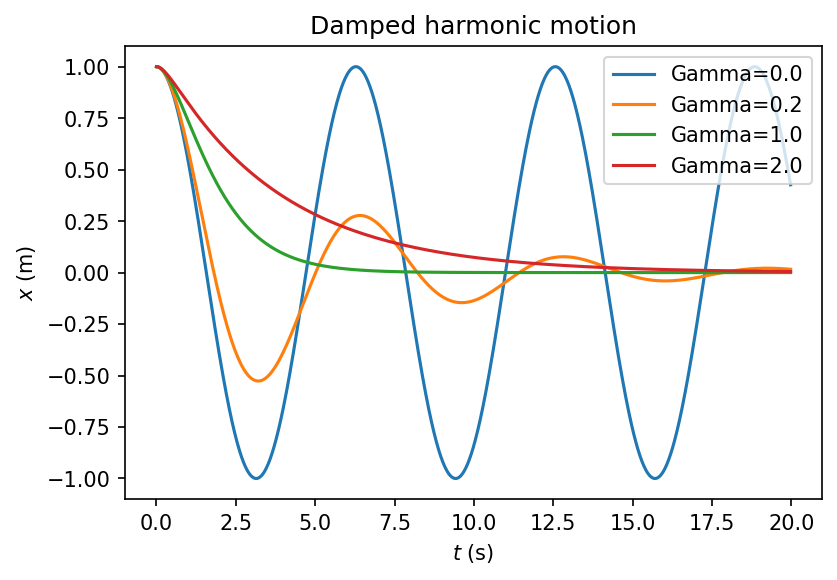

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def f(r,t):
    x = r[0]
    v = r[1]
        
    f = v
    fv = -2*gamma*w0*v - (w0**2)*x
    
    return f,fv

gamma_arr = np.array([0,0.2,1,2])
w0 = 1

x0 = 1.0
v0 = 0.0 # m/s
t0 = 0.0     
tf = 20.0    
N = 1000
h = (tf-t0)/N 
 
tpoints = np.arange(t0,tf,h)
plt.figure(dpi=150)
for gamma in gamma_arr:
    # set up array with initial values x0,y0,vx0,vy0
    r = np.array([x0,v0],float)
    
    rpoints = odeint(f,r,tpoints) 
    
    xpoints = rpoints[:,0]
    vpoints = rpoints[:,1]
    
    plt.plot(tpoints,xpoints,label='Gamma={0}'.format(gamma))#,'k-',label='$y$ (m)')  

plt.xlabel('$t$ (s)')
plt.ylabel('$x$ (m)')
plt.title('Damped harmonic motion')
plt.legend(loc='best')
plt.show()

If damping is large ($\gamma > 1$), the spring force needs a long time to return the object to its equilibrium position. If damping is small ($\gamma < 1$), the object returns to its equilibrium position faster but still has kinetic energy remaining when it reaches that position, causing it to overshoot. Critical damping is the fastest an object's motion can decay away while not overshooting the equilibrium position.

<br><br><br><br><br><br><br><br><br><br><br>
## Driven oscillator
Instead of examining damping processes, we can instead consider the effect of driving forces on oscilaltory motion. Imagine pushing a child on a swing as one example of this behavior. In this case, our differential equation becomes:

\begin{equation*} \frac{\mathrm{d}^2 x}{\mathrm{d}t^2} + 2\gamma\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega_0^2 x = F(t)/m \end{equation*}

where $F(t)$ is our driving force.


<br><br><br><br><br><br><br><br><br><br><br>
### Resonance
Let's examine the case of a periodic driving force $F(t)=F_d \cos(\omega_d t)$ where $\omega_D$ is the driving frequency and $F_d$ is the amplitude of the periodic driving force. Plot results for $\omega_d = 0.5\omega,\ \omega_d=\omega,\ \omega_d=1.5\omega$

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
#### Pre-generated solution:

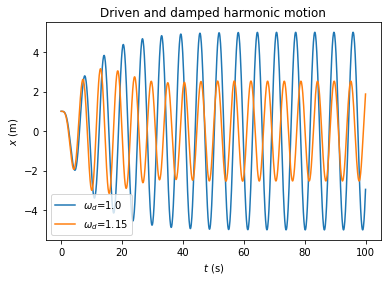

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def f(r,t):
    x = r[0]
    v = r[1]
        
    f = v
    fv = -2*gamma*w0*v - (w0**2)*x+Fd*np.cos(wd*t)
    
    return f,fv

gamma=0.1
w0 = 1
wd_arr = np.array([w0, w0*1.15])
Fd = w0**2

x0 = 1.0
v0 = 0.0 # m/s
t0 = 0.0     
tf = 100.0    
N = 1000
h = (tf-t0)/N 
 
tpoints = np.arange(t0,tf,h)

for wd in wd_arr:
    # set up array with initial values x0,y0,vx0,vy0
    r = np.array([x0,v0],float)
    
    rpoints = odeint(f,r,tpoints) 
    
    xpoints = rpoints[:,0]
    vpoints = rpoints[:,1]
    
    plt.plot(tpoints,xpoints,label='$\omega_d$={0}'.format(wd))#,'k-',label='$y$ (m)')  

plt.xlabel('$t$ (s)')
plt.ylabel('$x$ (m)')
plt.title('Driven and damped harmonic motion')
plt.legend(loc='best')
plt.show()

The behavior starts out irregular but settles into sinusoidal behavior with a frequency that corresponds to $\omega_d$. It is also interesting to note that the largest oscillations occur when $\omega_d=\omega_0$. We call this a resonance. 

<br><br><br><br><br><br><br><br><br><br><br><br>

### Student exploration:
Check what happens when you allow the driving frequency to take on values $\omega_d = n\omega_0$ and $\omega_d=\omega_0/n$ where $n$ takes integer values. Can you explain this behavior using qualitative arguments?

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
#### Pre-generated solution:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def f(r,t):
    x = r[0]
    v = r[1]
        
    f = v
    fv = -2*gamma*w0*v - (w0**2)*x+Fd*np.cos(wd*t)
    
    return f,fv

gamma=0.1
w0 = 1
wd_arr = np.array([0.5*w0, w0, 1.5*w0])
Fd = w0**2

x0 = 1.0
v0 = 0.0 # m/s
t0 = 0.0     
tf = 50.0    
N = 1000
h = (tf-t0)/N 
 
tpoints = np.arange(t0,tf,h)

for wd in wd_arr:
    # set up array with initial values x0,y0,vx0,vy0
    r = np.array([x0,v0],float)
    
    rpoints = odeint(f,r,tpoints) 
    
    xpoints = rpoints[:,0]
    vpoints = rpoints[:,1]
    
    plt.plot(tpoints,xpoints,label='$\omega_d$={0}'.format(wd))#,'k-',label='$y$ (m)')  

plt.xlabel('$t$ (s)')
plt.ylabel('$x$ (m)')
plt.title('Driven and damped harmonic motion')
plt.legend(loc='best')
plt.show()